In [16]:
import tensorflow as tf

# 匯入 MNIST 手寫阿拉伯數字 訓練資料
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [17]:
# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [18]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [19]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image

['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0

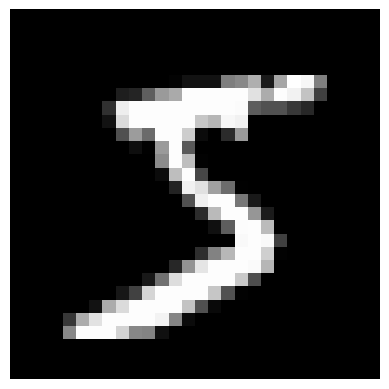

In [21]:
# 顯示第1筆資料圖像
import matplotlib.pyplot as plt
X2 = x_train[0]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

In [22]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
# 建立模型
# Dense：完全連接的神經層
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Dropout
# https://ithelp.ithome.com.tw/articles/10233758

In [24]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000000100，即第8個值為 1
y_train = tf.keras.utils.to_categorical(y_train) 
y_test = tf.keras.utils.to_categorical(y_test) 

In [25]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [26]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [27]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
# sparse_categorical_crossentropy --> categorical_crossentropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# 訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9469 - loss: 15.4339 - val_accuracy: 0.9566 - val_loss: 4.9046
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9450 - loss: 3.0975 - val_accuracy: 0.9375 - val_loss: 2.3908
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9106 - loss: 1.3405 - val_accuracy: 0.9120 - val_loss: 1.2519
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8716 - loss: 0.8147 - val_accuracy: 0.8994 - val_loss: 1.0582
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8652 - loss: 0.7050 - val_accuracy: 0.9138 - val_loss: 0.8509


In [ ]:
history.history.keys()

In [ ]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r', label='訓練')
plt.plot(history.history['val_accuracy'], 'g', label='驗證')
plt.legend()

In [ ]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r', label='訓練')
plt.plot(history.history['val_loss'], 'g', label='驗證')
plt.legend()

In [ ]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

In [ ]:
# 實際預測 20 筆
import numpy as np

# predictions = model.predict_classes(x_test_norm)
predictions = np.argmax(model.predict(x_test_norm), axis=-1)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', np.argmax(y_test[0:20], axis=1))

In [ ]:
# 顯示錯誤資料圖像
import matplotlib.pyplot as plt
X2 = x_test[8]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

In [ ]:
pred_prob = model.predict(x_test_norm)
np.around(pred_prob[8],3)

In [ ]:
# 使用 code\NN\CNN MNIST\05_04_CNN_model.py，寫0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

uploaded_file = './myDigits/1.png'
image1 = io.imread(uploaded_file, as_gray=True)
#image1 = Image.open(uploaded_file).convert('LA')
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255
# 反轉顏色
# 顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
X1 = np.abs(1-X1)
# predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

In [ ]:
# 顯示模型的彙總資訊
model.summary()

In [ ]:
# 模型存檔
model.save('model.h5')

In [ ]:
# 模型載入
model = tf.keras.models.load_model('model.h5')

In [ ]:
# 繪製模型
# 需安裝 graphviz (https://www.graphviz.org/download/)
# 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
# pip install graphviz
# pip install pydotplus
tf.keras.utils.plot_model(model, to_file='model.png')